<h2 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Métodos Numericos, Taller 2</span></h2>

<h1 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">M&eacute;todos iterativos y Solución de sistemas lineales</span></h1>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Universidad del Valle, Departamento de f&iacute;sica, Cali, Colombia</span></p>

<h3 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Miguel &Aacute;ngel Jaramillo Quengu&aacute;n</span></h3>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Codigo: 2070763</span></p>

<p style="text-align:center"><span style="font-family:Courier New,Courier,monospace"><a href="mailto:miguel.quenguan@correounivalle.edu.co">miguel.quenguan@correounivalle.edu.co</a></span></p>

<p style="text-align:center">Presentado a Miguel Angel Vargas</p>

5 de mayo 2022

## Ejercicio 1. Solución de Sistemas de Ecuaciones Lineales por Eliminación
Programe una función en python que cumpla con las siguientes condiciones:

1. input: Matriz cuadrada **A** de cualquier tamaño $n  \times n$, vector **b** de $n$  entradas.
2. output: Vector solución **x** del sistema $Ax=b$
3. Debera encontrar la solución del sistema mediante reducción de Gauss-Jordan y sustitucion hacia atrás.

In [103]:
# Importando paquetes

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [104]:
# Definimos Gauss jordan para una matriz diagonalmente dominante

def GA(A,b): # se debe notar que  crear una matriz que tenga las componentes de eliminacion requiere mas trabajo de maquina que definirla como se hace aqui
    n=len(b)
    ATI=[]    
    for k in range(n):
        if A[k][k]!=0:
            for i in range(k+1,n):
                F=A[i][k]/A[k][k]
                for j in range(n):
                    #print(A[i][j])
                    A[i][j]=A[i][j]-F*A[k][j]
                b[i]=b[i]-F*b[k]
    return A,b

# definimos la funcion que soluciona un sistema lineal nxn de la forma Ax=b, Donde A es una matriz triangular inferior de orden n

def BS(A,b):
    n=len(b)
    Xs=np.zeros(n)
    Xs[n-1]=(b[n-1]/A[n-1][n-1])
    
    for i in reversed(range(0,n-1)):
        s=0
        for j in reversed(range(0,n)):
            s=s+A[i][j]*Xs[j]
        x=(b[i]-s)/A[i][i]
        Xs[i]=x
    return Xs


In [206]:
# Se definira la funcion solve  de forma que como input tenga un sistema Ax=b donde A es  una matriz cuadrada de orden nxn y b un vector de n componentes 
def solve(A,b):
    A,b=GA(A,b)
    Xss=BS(A,b)
    print(f'Matriz Reducida:{A}, \n Vector b luego de la reduccion: {b}, \n SOLUCION del sistema triangular superior equivalente:{Xss}')
    return Xss

In [106]:
# SISTEMA DE PRUEBA mx=v
m=[[16,9,3],[4,18,9],[7,8,62]]
v=[12,10,15]
#print(solve(m,v))

matriz reducida:[[16, 9, 3], [0.0, 15.75, 8.25], [0.0, 0.0, 58.55952380952381]], 
 vector b luego de la reduccion: [12, 7.0, 7.944444444444445], 
 solucion del sistema triangular superior equivalente:[0.51453547 0.37338212 0.13566443]


---

## Ejercicio 2. matrices diagonalmente dominantes.

a. Presentación de la demostración del Lema de Hadmard.

b. Programe una función que determine si una matriz cuadrada A de cualquier tamaño $n\times n$, es diagonalmente dominante o no 

c. Ejecute y explique cada línea del siguiente codigo.
```
import numpy as np
n = 10
M = np.random.rand(n,n)
b = np.random.rand(n)
alpha = 3 * n
A = np.dot(M,M.T) + alpha * np.identity(n)
```

d.Utilice la función del inciso b, respondiendo, ¿Que tipo de matriz es asignada a la variable A?.

e. Utilice la función del ejercicio 1, para solucionar el sistema $A\vec x= \vec b$ con las variables definidas en el código anterior. (solución real) 

#### a. Demostración del Lema de hadamard

El lema de hadamard afirma: "Si A es estrictamente diagonalmente dominante entonces A es invertible". Para su demostracion se usamos el contrareciprico de la proposicion de este lema.


Suponiendo que $A=(a_{i,j}) : i,j \leq n \in \mathbb{N}$ una matriz cualquiera de orden $n\times n$ no es invertible, entonces su kernel no se reduce a 0, es decir que existe un vector $\vec x \neq 0$ tal que $A\vec x=\vec 0$

por tanto se tiene que : $\forall i \in [1,n], \displaystyle\sum_{j=1}^{n} a_{i,j}x_j=0$.

dado un $\vec x \neq 0$ existe $x_{i0}\neq 0$ tal que $|x_{i0}|=\displaystyle\max_{i\in[1,n]}{|x_i|}$.

Por lo anterior extrañendo el sumando relacionado con $x_{i0}$ se tiene:

$-a_{i0,i0}x_{i_0}=\displaystyle\sum_{j=1 \ ;\ j\neq {i0}}^{n} a_{i,j}x_j$, 

Entonces tenemos: $|a_{i0,i0}x_{i_0}|\leq \displaystyle\sum_{j=1 \ ;\ j\neq {i0}}^{n} |a_{i,j}x_j|$, sabiendo, $\frac{x_j}{x_{i0}}\leq 1$ tenemos:

$|a_{i0,i0}|\ |x_{i_0}|\leq \displaystyle\sum_{j=1 \ ;\ j\neq {i0}}^{n} |a_{i,j}|\ |x_j|$.

$|a_{i0,i0}|\leq \displaystyle\sum_{j=1 \ ;\ j\neq {i0}}^{n} |a_{i,j}|\ \frac{|x_j|}{|x_{i_0}|}\leq \displaystyle\sum_{j=1 \ ;\ j\neq {i0}}^{n} |a_{i,j}|$

demostramos pues que si la matriz no es invertible esta no es estrictamentente dominante.

#### nota
Este lema es de gran ayuda ya que si la matriz es invertible el sistema asociado a esta tiene solucion unica, de forma que la estructura de matriz diagonalmente dominante es de gran importancia, las matrices de este tipo se pondran a prueba a lo largo de este trabajo.


### b. codigo para saber si una matriz diagonalmente dominante

El input del codigo simplemente es una matriz de orden n, la funcion retornara TRUE cuando la condicion de diagonalmente dominante se cumpla

In [107]:
# codigo para saber si una matriz es diagonalmente dominante o no.
def DD(A):

    n=len(A)

    for i in range(n):
        s=0
        for j in range(n):
            if i != j:
                s=s+A[i][j]
        if s<A[i][i]: #en esta linea la condicion que una matriz sea diagonalmente dominante es que la suma de las componenetes distintas de la diagonal sea menor que el elemento en la diagonal.
            d=True
        else:
            d=False

        if d==True:
            continue
        else:
            print(f'La matriz no es diagonalmente dominante ya que la condición no se cumple en la fila {i}')
            break

    if d==True:
        print(f'La matriz es diagonalmente dominante por filas')
        return True


In [108]:
print(DD(m))

la matriz es diagonalmente dominante por filas
True


### c. Explicar el codigo
en el siguiente codigo estan comentadas cada linea del codigo, con el codigo se definio una funcion generadora de matrices aleatorias que son diagonalmente dominantes con entradas entre 0 y 1

In [178]:
#parte C
def GEN(N):
    # import numpy as np # importamos la libreria Numpy 
    n = N # establecemos un orden de la matriz y el vector que se genera acontinuacion
    M = np.random.rand(n,n) + np.random.randint(n+1, size=(n, n)) # esta linea genera una matriz de arreglo en numpy de orden nxn con n establecido en la anterior line, con valores entre 0 y 1
    b = np.random.rand(n) + np.random.randint(n/2, size=n) # genera un arrelgo numpy de n componentes
    alpha = 5 * n # definimos una constante alpha
    A = np.dot(M,M.T) + alpha * np.identity(n) #en esta linea al producto matricial de M por si transpuesta le sumamos una matriz con 3*n en la diagonal 
    A=A.tolist()
    b=b.tolist()
    return A,b

'''
NOTA 
Se añadio en las lineas 5 y 6 lo siguiente
+ np.random.randint(n/2, size=(n, n))
lo anterior con la intension de tener Matrices diagonalmente dominantes con entradas reales mayores a 1 de -n-1 a n+1 esto claro en entradas diferentes a las de la diagonal 
Esta correccion se realiza con la intencion de observar el comportamiento de convergencia en metodos iterativos ya que de lo contrario estas matrices con entradas pequeñas convergen 
muy rapidamente y no se parecia una diferencia entre metodos

'''

'\nNOTA \nSe añadio en las lineas 5 y 6 lo siguiente\n+ np.random.randint(n/2, size=(n, n))\nlo anterior con la intension de tener Matrices diagonalmente dominantes con entradas reales mayores a 1 de -n-1 a n+1 esto claro en entradas diferentes a las de la diagonal \nEsta correccion se realiza con la intencion de observar el comportamiento de convergencia en metodos iterativos ya que de lo contrario estas matrices con entradas pequeñas convergen \nmuy rapidamente y no se parecia una diferencia entre metodos\n\n'

### d. solcuion de una matriz aleatoria
luego de generar la matriz con la funcion antes definida encontraremos la solucion del sistema como sigue:

In [180]:
#parte d
M,x=GEN(3) # la funcion a analizar nos genera una matriz diagonalmente dominante y un vector ambos de orden n en este caso 3
print(f'La matriz generada fue: {M} \nel vector generado fue: {x}\n')
print(f'SOLUCION DEL SISTEMA ALEATORIO GENERADO:\n')
print(solve(M,x))

la matriz generada fue: [[38.59256919051589, 14.852165256243042, 15.037856651440457], [14.852165256243042, 27.381454236935085, 9.08186453222131], [15.037856651440457, 9.08186453222131, 25.081993532270957]] 
el vector generado fue: [0.5043490998751003, 0.9975253457674701, 0.8234305822941164]

SOLUCION DEL SISTEMA ALEATORIO GENERADO

matriz reducida:[[38.59256919051589, 14.852165256243042, 15.037856651440457], [0.0, 21.665669633173536, 3.294617485145362], [0.0, 0.0, 18.72139039268426]], 
 vector b luego de la reduccion: [0.5043490998751003, 0.8034290123203761, 0.5047330806647112], 
 solucion del sistema triangular superior equivalente:[-0.01013015  0.0329833   0.02696023]


---

### Ejercicio 3. Métodos iterativos

El objetivo de este ejercicio es comparar los métodos de Jacobi y Gauss-Seidel vistos en clase. Lacondición de parada de los métodos es $||x-x^{(i)}||_2<10^{-6}$, donde $x$ es la solución real y $x^{(i)}$ es la solución obtenida en cada iteración (i).

a. programe una funcion que arroje en una lista la sucesion de solcuiones por cada iteración $x^{(i)}$ del metodo de jacobi.



In [ ]:
#PRUEBA
m=[[16,9,3],[4,18,9],[7,8,62]]
v=[12,10,15]

In [187]:
def JB(A,b,g):
    n=len(b)
    Cs=[]
    T=[]

    for k in range(n):
        c=b[k]/A[k][k]
        Cs.append(c)

    for i in range(n):
        Aux=[]
        for j in range(n):
            aux=A[i][j]/A[i][i]*(-1)
            Aux.append(aux)
        T.append(Aux)
    T=T+np.identity(n)
            
    v=np.zeros(n)#vector de aproximacion incial de iteracion
    v=v.tolist()
    list_S=[]
    for m in range(g):
        S=np.dot(T,v)+Cs
        list_S.append(S)
        v=S
    return list_S


In [209]:
#iterando metodo de jacobi  prueba
#print(JB(m,v,50))

### b programamos el metodo de gauss seidel

In [188]:
# gauss seidel usando la iteracion anterior
def GS(A,b,g):#falta i de iteracion
    n=len(b)
    Cs=[]
    T=[]
    # definimos AUX=(D-L)^-1
    AUX=[]
    for i in range(n):
        aux=[]
        for j in range(n):
            if i>=j:
                aux.append(A[i][j])
            else:
                aux.append(0.0)
        AUX.append(aux)

    T=np.linalg.inv(AUX)
    T=T.tolist()
    
    #definimos U
    AUX2=[]
    for i in range(n):
        aux2=[]
        for j in range(n):
            if i<j:
                aux2.append(A[i][j])
            else:
                aux2.append(0.0)
        AUX2.append(aux2)

    U=np.multiply(AUX2,-1)

    #print(f'U{U},T{T}')

    Tg=np.dot(T,U)
    Cg=np.dot(T,b)
    v=np.zeros(n)#vector de aproximacion incial de iteracion
    v=v.tolist()
    list_S=[]
    for m in range(g):
        S=np.dot(Tg,v) + Cg
        list_S.append(S)
        v=S

    return list_S
    



en el metodo de jacobi converge mas rapido, debido a que necesita menos iteraciones para llegar a la solucion

In [210]:
#print(GS(m,v,50))

c. utilizando la Matriz generada (M) y el vector (x)

In [215]:

It=50 #numero de iteraciones
Or=3 #orden del sistema lineal

M,x=GEN(Or) 
Ljb=JB(M,x,It)
Lgs=GS(M,x,It)
#print(Ljb,'--------\n',Lgs)

#NOTA AL GENERAR UNA MATRIZ ALEATORIA NUEVA SI SE CORRE LAS SIGUIENTES
#CELDAS ESTAS TOMARAN LOS RESULTADOS CALCULANDO CON LA NUEVA MATRIZ GENERADA

d. calculando los errores con la norma 2 entre las 2 listas de solucion.

In [216]:
#se calcula la diferencia en cada iteracion
sol=solve(M,x)
ERRjb=[]
ERRgs=[]
for i in range(It):
    errjb=np.linalg.norm(Ljb[i]-sol,2)
    errgs=np.linalg.norm(Lgs[i]-sol,2)
    ERRjb.append(errjb)
    ERRgs.append(errgs)


Matriz Reducida:[[30.117762488783672, 9.783247179396136, 6.275436047817257], [0.0, 20.358732672319668, 1.827165331017675], [0.0, 0.0, 16.327016903702603]], 
 Vector b luego de la reduccion: [0.6247984690653777, 0.30363070877524356, 0.3247272871567981], 
 SOLUCION del sistema triangular superior equivalente:[0.01233631 0.01312902 0.01988895]


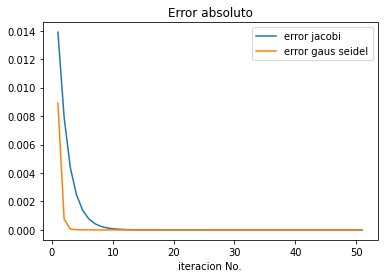

In [222]:
q=np.linspace(1,It+1,It)

plt.title('Error absoluto')
plt.xlabel('iteracion No.')
plt.plot(q,ERRjb,label='error jacobi')
plt.plot(q,ERRgs,label='error gaus seidel')
plt.legend()
plt.show()

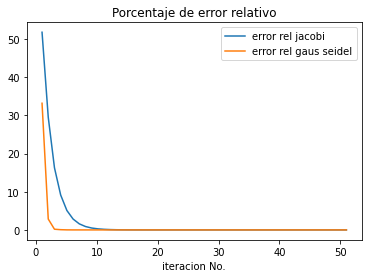

In [223]:
ERRjbR=[]
ERRgsR=[]
for h in range(It):
    ERRjbr=np.multiply(ERRjb[h],1/np.linalg.norm(sol,2))*100
    ERRjbR.append(ERRjbr)

for s in range(It):
    ERRgsr=np.multiply(ERRgs[s],1/np.linalg.norm(sol,2))*100
    ERRgsR.append(ERRgsr)

plt.title('Porcentaje de error relativo')
plt.xlabel('iteracion No.')
plt.plot(q,ERRjbR,label='error rel jacobi')
plt.plot(q,ERRgsR,label='error rel gaus seidel')
plt.legend()
plt.show()


### f. analisis de error y diferencias de metodos
Es muy apreciable en las curvas como el metodo de gauss seidel converge de manera mas rapida que el de jacobi esto debido al uso de informacion ya encontrada en una misma iteracion del metodo. 

Es de importante mencion que estos metodos de solucion de sistemas lineales convergen desde un vector inicial cualquiera, esto es posible por teoremas como el punto fijo de banach y el lema de hadamard que me aseguran que el sistema de iteraciones convergeran a la solucion del sistema de ecuaciones lineales.

---

### Referencias. 
[1] Gómez Pérez, A. (2018). Métodos iterativos para sistemas de ecuaciones lineales.

[2] Isaacson, E., & Keller, H. B. (2012). Analysis of numerical methods. Courier Corporation.

[3] Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.